'lp' (Line Profile) Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units


logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Line profiles have an extra dimension than [LC](LC.ipynb) and [RV](RV.ipynb) datasets which have times as their independent variable.  For that reason, the parameters in the LP dataset are tagged with individual times instead of having a separate times array.  This allows the flux_densities and sigmas to be per-time.  Because of this, times is not a variable, but instead **must** be passed when you call [b.add_dataset](../api/phoebe.frontend.bundle.Bundle.add_dataset.md).  At that point, in order to change the times you would need to remove and re-add the dataset.

Let's add a line profile dataset to the Bundle (see also the [lp API docs](../api/phoebe.parameters.dataset.lp.md)).  Some parameters are only visible based on the values of other parameters, so we'll pass `check_visible=False` (see the [filter API docs](../api/phoebe.parameters.ParameterSet.filter.md) for more details).  These visibility rules will be explained below.

In [4]:
b.add_dataset('lp', times=[0,1,2], wavelengths=phoebe.linspace(549, 551, 101))
print(b.get_dataset(kind='lp', check_visible=False))

ParameterSet: 32 parameters
       profile_func@lp01@dataset: gaussian
       profile_rest@lp01@dataset: 550.0 nm
         profile_sv@lp01@dataset: 0.0001
           passband@lp01@dataset: Johnson:V
   intens_weighting@lp01@dataset: energy
  wavelengths@primary@lp01@da...: [] nm
  wavelengths@secondary@lp01@...: [] nm
  wavelengths@binary@lp01@dat...: [549.   549.02 549.04 ... 550.96 550.98
 551.  ] nm
  00.000000@flux_densities@pr...: [] W / (m2 nm)
  00.000000@flux_densities@se...: [] W / (m2 nm)
  00.000000@flux_densities@bi...: [] W / (m2 nm)
  00.000000@sigmas@primary@lp...: [] W / (m2 nm)
  00.000000@sigmas@secondary@...: [] W / (m2 nm)
  00.000000@sigmas@binary@lp0...: [] W / (m2 nm)
  01.000000@flux_densities@pr...: [] W / (m2 nm)
  01.000000@flux_densities@se...: [] W / (m2 nm)
  01.000000@flux_densities@bi...: [] W / (m2 nm)
  01.000000@sigmas@primary@lp...: [] W / (m2 nm)
  01.000000@sigmas@secondary@...: [] W / (m2 nm)
  01.000000@sigmas@binary@lp0...: [] W / (m2 nm)
  02.0

For information on the included passband-dependent parameters (not mentioned below), see the section on the [lc dataset](LC.ipynb).

### times

In [7]:
print(b.get_dataset(kind='lp').times)

['00.000000', '01.000000', '02.000000']


### wavelengths

In [9]:
print(b.filter(qualifier='wavelengths'))

ParameterSet: 3 parameters
  wavelengths@primary@lp01@da...: [] nm
  wavelengths@secondary@lp01@...: [] nm
  wavelengths@binary@lp01@dat...: [549.   549.02 549.04 ... 550.96 550.98
 551.  ] nm


In [10]:
print(b.get_parameter(qualifier='wavelengths', component='binary'))

Parameter: wavelengths@binary@lp01@dataset
                       Qualifier: wavelengths
                     Description: Wavelengths of the observations
                           Value: <linspace start=549.0 stop=551.0 num=101 endpoint=True unit=nm>
                  Constrained by: 
                      Constrains: None
                      Related to: None



### components

Line profiles will be computed for each component in which the wavelengths are provided.  If we wanted to expose the line profile for the binary as a whole, we'd set the wavelenghts for `wavelengths@binary`.  If instead we wanted to expose per-star line profiles, we could set the wavelengths for both `wavelengths@primary` and `wavelengths@secondary`.

If you're passing wavelengths to the [b.add_dataset](../api/phoebe.frontend.bundle.Bundle.add_dataset.md) call, it will default to filling the wavelengths at the *system-level*.  To override this, pass `components=['primary', 'secondary']`, as well.  For example: `b.add_dataset('lp', wavelengths=np.linspace(549,551,101), components=['primary', 'secondary'])`.

### flux_densities

In [11]:
print(b.filter(qualifier='flux_densities'))

ParameterSet: 3 parameters
  00.000000@flux_densities@bi...: [] W / (m2 nm)
  01.000000@flux_densities@bi...: [] W / (m2 nm)
  02.000000@flux_densities@bi...: [] W / (m2 nm)


In [13]:
print(b.get_parameter(qualifier='flux_densities', 
                      component='binary',
                      time=0.0))

Parameter: 00.000000@flux_densities@binary@lp01@dataset
                       Qualifier: flux_densities
                     Description: Flux density per wavelength (must be same length as wavelengths or empty)
                           Value: [] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



### sigmas

In [14]:
print(b.filter(qualifier='sigmas'))

ParameterSet: 3 parameters
  00.000000@sigmas@binary@lp0...: [] W / (m2 nm)
  01.000000@sigmas@binary@lp0...: [] W / (m2 nm)
  02.000000@sigmas@binary@lp0...: [] W / (m2 nm)


In [15]:
print(b.get_parameter(qualifier='sigmas', 
                      component='binary',
                      time=0))

Parameter: 00.000000@sigmas@binary@lp01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty on flux_densities
                           Value: [] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



### profile_func

In [16]:
print(b.get_parameter(qualifier='profile_func'))

Parameter: profile_func@lp01@dataset
                       Qualifier: profile_func
                     Description: Function to use for the rest line profile
                           Value: gaussian
                         Choices: gaussian, lorentzian



### profile_rest

In [17]:
print(b.get_parameter(qualifier='profile_rest'))

Parameter: profile_rest@lp01@dataset
                       Qualifier: profile_rest
                     Description: Rest central wavelength of the profile
                           Value: 550.0 nm
                  Constrained by: 
                      Constrains: None
                      Related to: None



### profile_sv

In [18]:
print(b.get_parameter(qualifier='profile_sv'))

Parameter: profile_sv@lp01@dataset
                       Qualifier: profile_sv
                     Description: Subsidiary value of the profile
                           Value: 0.0001
                  Constrained by: 
                      Constrains: None
                      Related to: None



Synthetics
------------------

In [19]:
b.run_compute(irrad_method='none')

<ParameterSet: 4 parameters | qualifiers: wavelengths, flux_densities>

In [20]:
print(b.filter(context='model').twigs)

['wavelengths@binary@lp01@phoebe01@latest@lp@model', '00.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model', '01.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model', '02.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model']


The model for a line profile dataset will expose flux-densities at each time and for each component where the corresponding wavelengths Parameter was not empty.  Here since we used the default and exposed line-profiles for the entire system, we have a single entry per-time.

In [21]:
print(b.filter(qualifier='flux_densities', context='model'))

ParameterSet: 3 parameters
  00.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
  01.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
  02.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)


In [22]:
print(b.get_parameter(qualifier='flux_densities', context='model', time=0))

Parameter: 00.000000@flux_densities@latest@model
                       Qualifier: flux_densities
                     Description: Flux density per wavelength (must be same length as wavelengths or empty)
                           Value: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



Plotting
---------------

By default, LP datasets plot as 'flux_densities' vs 'wavelengths' for a **single time**.

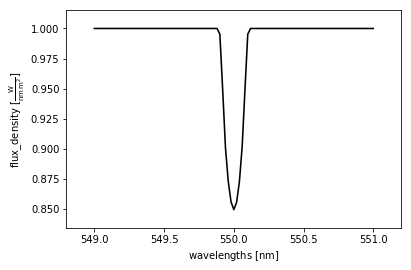

In [23]:
afig, mplfig = b.filter(dataset='lp01', context='model', time=0).plot(show=True)

Mesh Fields
---------------------

Let's add a single mesh and see which columns from the line profile dataset are available to expose as a column in the mesh.

In [24]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [25]:
print(b.get_parameter(qualifier='columns').choices)

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'intensities@lp01', 'normal_intensities@lp01', 'abs_intensities@lp01', 'abs_normal_intensities@lp01', 'boost_factors@lp01', 'ldint@lp01', 'pblum_ext@lp01', 'abs_pblum_ext@lp01', 'ptfarea@lp01', 'rvs@lp01']


Since line profiles are passband-dependent, we get all passband-dependent mesh quantities as options (see [LC](LC.ipynb) for details).  Additionally, we get `rvs@lp01`, which under-the-hood is being used to determine the doppler shift of the line profile per-element and then summed over the star (see [RV](RV.ipynb) for details).  To avoid large amounts of data being stored in the mesh with an extra dimension, the per-element line profiles are never stored, and therefore not able to be exposed to the user.